# Tips Dataset Keşfi ve Görselleştirme Pratiği

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset("tips")

In [3]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape


(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### Sayısal Değişkenlerin İncelenmesi


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


📝 **Notlarım:**

- **total_bill**: Ortalama hesap 20 dolar, çoğu müşteri 25 doların altında ödeme yapmış.  
- **tip**: Ortalama bahşiş 3 dolar, genellikle 2–4 dolar aralığında. Minimum 1 dolar, maksimum 10 dolar.  
- **size**: Ortalama grup büyüklüğü 2.6 kişi. Çoğunlukla 2–3 kişilik gruplar halinde gelinmiş.  


#### Kategorik Değişkenlerin Dağılımı


In [7]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [8]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [9]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [10]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

📝 **Notlarım:**

- **Cinsiyet (sex):** Erkek müşteri sayısı (157), kadınlardan (87) daha fazla.  
- **Sigara (smoker):** Çoğunluk sigara içmiyor (151). Sigara içenler de hatırı sayılır bir oran (%38).  
- **Gün (day):** En yoğun gün Cumartesi (87 müşteri), en az müşteri Cuma günü (19). Hafta sonları restoran daha kalabalık.  
- **Zaman (time):** Çoğu müşteri akşam yemeğinde geliyor (176 kişi), öğlen yemeği daha az tercih edilmiş (68).  


#### Eksik Değer Kontrolü


In [11]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Değişkenlerin Tiplerine Göre İncelenmesi


In [12]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [13]:
num_cols=df.select_dtypes(include=["float64","int64"]).columns
print("Sayısal Değişkenler:", list(num_cols))



Sayısal Değişkenler: ['total_bill', 'tip', 'size']


In [14]:
cat_cols=df.select_dtypes(include=["category"]).columns
print("Kategorik Değişkenler:",list(cat_cols))

Kategorik Değişkenler: ['sex', 'smoker', 'day', 'time']


#### Sayısal Değişkenler Üzerine Hesaplamalar


In [15]:
num_summary=df[num_cols].agg(["mean","median","std","min","max"])
num_summary

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
median,17.795000,2.900000,2.000000
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
max,50.810000,10.000000,6.000000


In [16]:
num_corr=df[num_cols].corr()
num_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


📝 **Notlarım:**

- **total_bill:** Aşırı uç değerler olsa da dağılım dengeli.  
- **tip:** Bahşiş dağılımı dengeli.  
- **size:** Ortalama grup büyüklüğü 2.6 kişi, ortanca 2 → çoğunlukla küçük gruplar halinde gelinmiş.  

📊 **Korelasyonlar:**
- Hesap ile bahşiş arasında güçlü pozitif ilişki var (0.67). Hesap yükseldikçe bahşiş de artıyor.  
- Hesap ile grup büyüklüğü arasında orta düzey ilişki var (0.60). Grup büyüdükçe hesap artıyor.  
- Grup büyüklüğü ile bahşiş arasında daha zayıf ama pozitif bir ilişki var (0.49). Büyük gruplar daha fazla bahşiş bırakıyor, fakat artış hesap kadar güçlü değil.  


#### Kategorik ve Sayısal Değişkenlerin İlişkisi


In [22]:
df.groupby("sex",observed=True)["tip"].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [23]:
df.groupby("day",observed=True)["total_bill"].sum()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

In [24]:
df.groupby("time",observed=True)["total_bill"].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

📝 **Notlarım:**

- **Cinsiyet (sex):**  Erkeklerin ortalama bahşişi kadınlardan biraz daha yüksek.  
- **Gün (day):**  Restoran hafta sonu çok daha yoğun.  
- **Zaman (time):**  Akşam gelenler daha fazla harcama yapıyor.  


#### Kategorik ve Sayısal İlişkilerin Görselleştirilmesi


In [26]:
sex_tip=df.groupby("sex",observed=True)["tip"].mean()

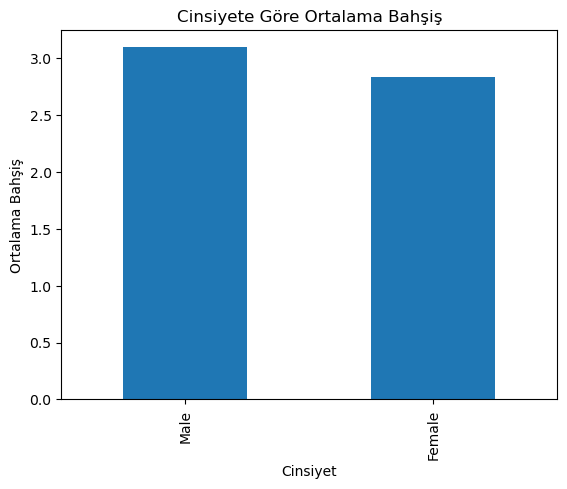

In [28]:
sex_tip.plot(kind="bar",title="Cinsiyete Göre Ortalama Bahşiş", ylabel="Ortalama Bahşiş",xlabel="Cinsiyet")
plt.show()

In [29]:
day_totalbill=df.groupby("day",observed=True)["total_bill"].sum()

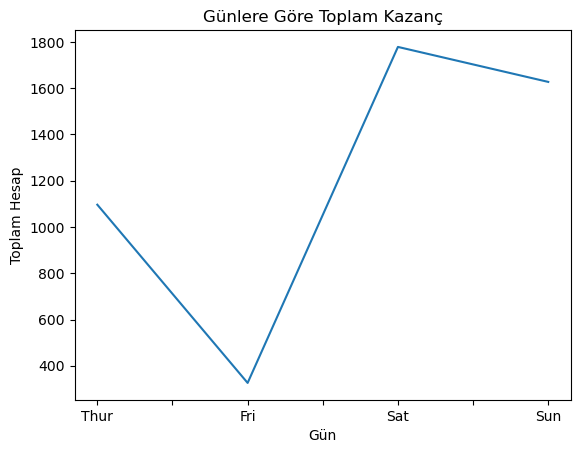

In [35]:
day_totalbill.plot(kind="line",title="Günlere Göre Toplam Kazanç",ylabel="Toplam Hesap",xlabel="Gün")
plt.show()

In [31]:
time_totalbill=df.groupby("time",observed=True)["total_bill"].mean()

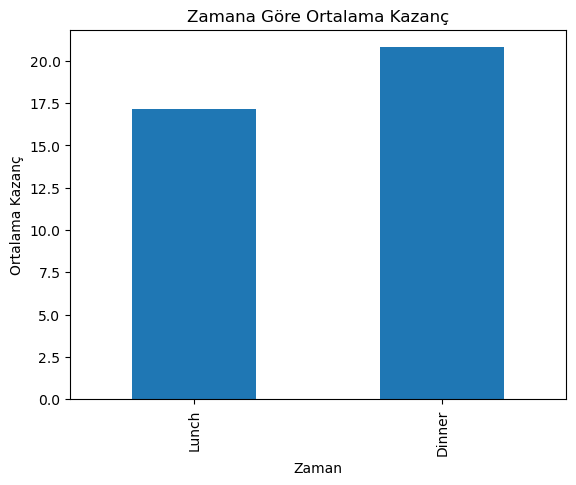

In [36]:
time_totalbill.plot(kind="bar",title="Zamana Göre Ortalama Kazanç",ylabel="Ortalama Kazanç", xlabel="Zaman")
plt.show()

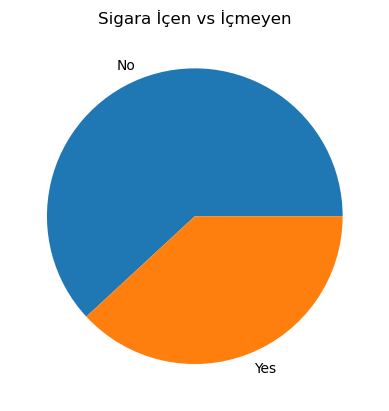

In [57]:
df["smoker"].value_counts().plot(kind="pie", title="Sigara İçen vs İçmeyen")
plt.ylabel("")
plt.show()

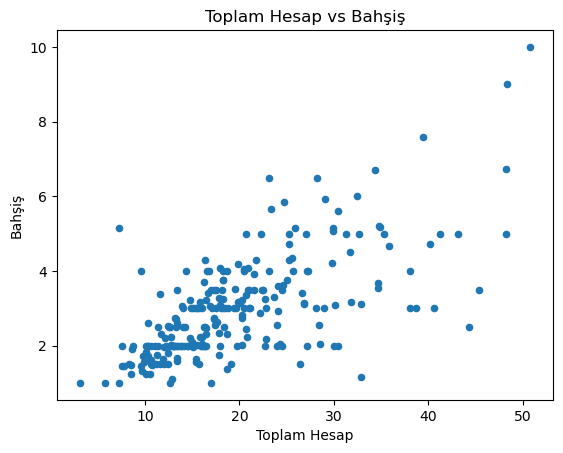

In [61]:
df.plot(kind="scatter",x="total_bill", y="tip",title="Toplam Hesap vs Bahşiş", xlabel="Toplam Hesap",ylabel="Bahşiş")
plt.show()

#### Yeni Değişkenler Oluşturma


In [38]:
df["Bahşiş Yüzdesi"]=df["tip"]/df["total_bill"]*100
df["Bahşiş Yüzdesi"]

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: Bahşiş Yüzdesi, Length: 244, dtype: float64

In [39]:
df[["total_bill","tip","Bahşiş Yüzdesi"]].head()

,total_bill,tip,Bahşiş Yüzdesi
0,16.99,1.01,5.944673
1,10.34,1.66,16.054159
2,21.01,3.50,16.658734
3,23.68,3.31,13.978041
4,24.59,3.61,14.680765


In [44]:
df["Kişi Başı Hesap"]=df["total_bill"]/df["size"]
df["Kişi Başı Hesap"].head()


0     8.495000
1     3.446667
2     7.003333
3    11.840000
4     6.147500
Name: Kişi Başı Hesap, dtype: float64

In [45]:
df[["total_bill","tip","Kişi Başı Hesap"]].head()

,total_bill,tip,Kişi Başı Hesap
0,16.99,1.01,8.495000
1,10.34,1.66,3.446667
2,21.01,3.50,7.003333
3,23.68,3.31,11.840000
4,24.59,3.61,6.147500


#### Yeni Değişkenlerin Görselleştirilmesi


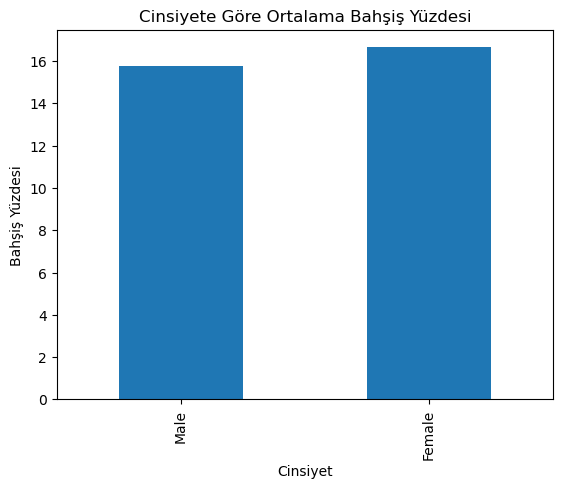

In [48]:
df.groupby("sex",observed=True)["Bahşiş Yüzdesi"].mean().plot(kind="bar", title="Cinsiyete Göre Ortalama Bahşiş Yüzdesi", ylabel="Bahşiş Yüzdesi",xlabel="Cinsiyet")
plt.show()


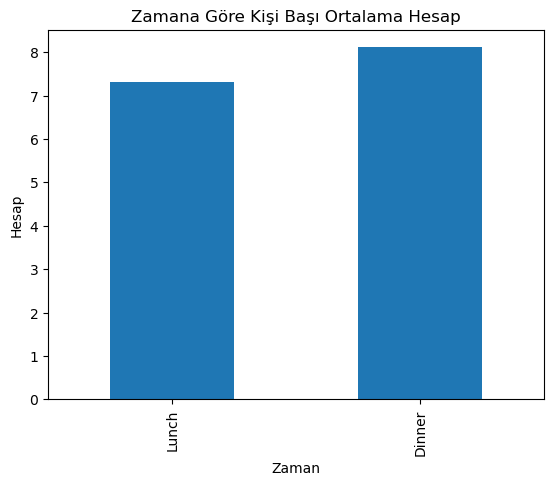

In [51]:
df.groupby("time",observed=True)["Kişi Başı Hesap"].mean().plot(kind="bar",title="Zamana Göre Kişi Başı Ortalama Hesap",ylabel="Hesap",xlabel="Zaman")
plt.show()

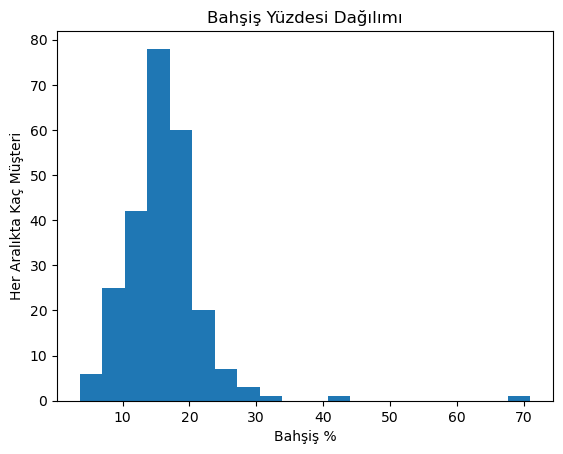

In [54]:
df["Bahşiş Yüzdesi"].plot(kind="hist", bins=20,title="Bahşiş Yüzdesi Dağılımı")
plt.xlabel("Bahşiş %")
plt.ylabel("Her Aralıkta Kaç Müşteri")
plt.show()